# Building and Property Violations: Filtering
### Author: Eddie Jones

This notebook takes a copy of the Building and Property Violations dataset from Februrary 2023, keeps only the violations that have to do with CMR410, and separates the violations into specific groups based on a given array of locations intended for use on separate datasets in the extension project. The results of the separation are given as a graph and in text form.

To separate the violations into these groups, geolocation was used based on each violation's longitude and latitude. The corresponding "neighborhood" was stored in a new column on the Building and Property Violations dataset. This dataset was saved as a .csv and can be found in our GitHub.  

In [4]:
valid_locs = ['Mission Hill', 
              'Fenway', 
              'Back Bay', 
              'Allston', 
              'Brighton', 
              'Jamaica Plain', 
              'Roslindale', 
              'Hyde Park', 
              'West Roxbury',
              'Mattapan', 
              'Dorchester', 
              'East Boston', 
              'North End', 
              'West End', 
              'Longwood Medical Area', 
              'Roxbury', 
              'South Boston Waterfront',
              'Charlestown',
              'South End',
              'Bay Village',
              'Leather District',
              'South Boston',
              'Harbor Islands']


In [2]:
import pandas as pd

df = pd.read_csv('BUILDING_AND_PROPERTY_VIOLATIONS.csv')

In [113]:
df = df[df.code.str.startswith("CMR410")]
len(df)

8636

In [117]:
from geopy import Nominatim, GoogleV3
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent='undefined',timeout=1)
rate = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)

In [116]:
def neighborhood(coord):
    loc = rate(coord)
    loc_arr = loc.address.split(", ")
    if len(loc_arr) == 8:
        neighborhood = loc_arr[2]
    else:
        neighborhood = loc_arr[3]
    return neighborhood

In [118]:
df["location"] = df["location"].apply(lambda x : x.replace('(',"").replace(')',"").replace(","," ,"))
df["neighborhood"] = df["location"].apply(neighborhood)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('42.28321999990916 , -71.07547000075886',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/urllib3/util/connection.py", line 95, in create_connection
    raise err
  File "/usr/local/lib/python3.11/site-packages/urllib3/util/connection.py", line 85, in create_connection
    sock.connect(sa)
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/urllib3/connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
                       ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/urllib3/connectionpool.py", line 386, in _make_request
    sel

In [124]:
df.to_csv("BUILDING_WITH_NEIGHBORHOODS.csv")

<AxesSubplot: xlabel='neighborhood'>

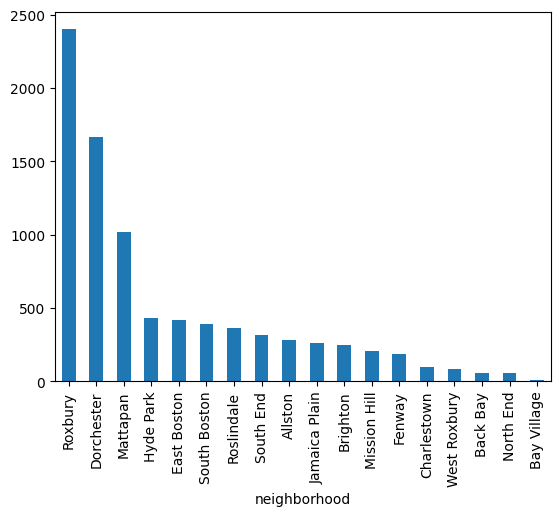

In [5]:
df2 = pd.read_csv("BUILDING_WITH_NEIGHBORHOODS.csv")
neighborhoods = df2[["neighborhood", "case_no"]]
neighborhoods = neighborhoods.dropna()
neighborhoods["neighborhood"] = neighborhoods["neighborhood"].apply(lambda x : x.replace("Fenway / Kenmore","Fenway"))
neighborhoods = neighborhoods[neighborhoods.neighborhood.isin(valid_locs)]
neighborhoods.groupby("neighborhood")["case_no"].count().sort_values(ascending=False).plot(kind="bar")

In [6]:
final_count = neighborhoods.groupby("neighborhood")["case_no"].count().sort_values(ascending=False)
print(final_count)
final_count.to_csv("VIOLATIONS_NEIGHBORHOOD_COUNT.csv")

neighborhood
Roxbury          2401
Dorchester       1665
Mattapan         1017
Hyde Park         432
East Boston       416
South Boston      393
Roslindale        360
South End         312
Allston           282
Jamaica Plain     263
Brighton          245
Mission Hill      204
Fenway            186
Charlestown        94
West Roxbury       80
Back Bay           57
North End          55
Bay Village         5
Name: case_no, dtype: int64
